<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/MelaSecondoEsperimentoVersioneDefinitiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Relevance'

relevance = '1nwGbyk8q2S-0BkLcyFVqdK6emTooxHJv'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

dfr = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

sort = 'Date'

date = '1Pb2It9WPid9Irjp6bRVgCF7B3Y5ARBjT'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': date})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

dfd = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

In [5]:
american_male_relevance = dfr[(dfr['typology']=='American') & (dfr['gender']=='masculine') & (dfr['number']<=20)]
american_male_date = dfd[(dfd['typology']=='American')  & (dfd['gender']=='masculine') & (dfd['number']<=20)]
american_female_relevance = dfr[(dfr['typology']=='American') & (dfr['gender']=='feminine') & (dfr['number']<=20)]
american_female_date = dfd[(dfd['typology']=='American')  & (dfd['gender']=='feminine') & (dfd['number']<=20)]

tot_american_male_relevance = sum(american_male_relevance['number']) / len(american_male_relevance)
tot_american_male_date = sum(american_male_date['number']) / len(american_male_date)
tot_american_female_relevance = sum(american_female_relevance['number']) / len(american_female_relevance)
tot_american_female_date = sum(american_female_date['number']) / len(american_female_date)


#labels = ['OrdinamentoYelp', 'OrdinamentoData']
american_male = [tot_american_male_relevance, tot_american_male_date] 
american_female = [tot_american_female_relevance, tot_american_female_date]



In [6]:
asian_male_relevance = dfr[(dfr['typology']=='Japanese') & (dfr['gender']=='masculine') & (dfr['number']<=20)]
asian_male_date = dfd[(dfd['typology']=='Japanese')  & (dfd['gender']=='masculine') & (dfd['number']<=20)]
asian_female_relevance = dfr[(dfr['typology']=='Japanese') & (dfr['gender']=='feminine') & (dfr['number']<=20)]
asian_female_date = dfd[(dfd['typology']=='Japanese')  & (dfd['gender']=='feminine') & (dfd['number']<=20)]

tot_asian_male_relevance = sum(asian_male_relevance['number']) / len(asian_male_relevance)
tot_asian_male_date = sum(asian_male_date['number']) / len(asian_male_date)
tot_asian_female_relevance = sum(asian_female_relevance['number']) / len(asian_female_relevance)
tot_asian_female_date = sum(asian_female_date['number']) / len(asian_female_date)


#labels = ['OrdinamentoYelp', 'OrdinamentoData']
asian_male = [tot_asian_male_relevance, tot_asian_male_date] 
asian_female = [tot_asian_female_relevance, tot_asian_female_date]





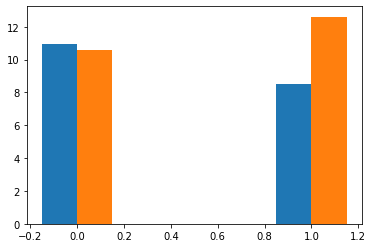

In [7]:
mexican_male_relevance = dfr[(dfr['typology']=='Mexican') & (dfr['gender']=='masculine') & (dfr['number']<=20)]
mexican_male_date = dfd[(dfd['typology']=='Mexican')  & (dfd['gender']=='masculine') & (dfd['number']<=20)]
mexican_female_relevance = dfr[(dfr['typology']=='Mexican') & (dfr['gender']=='feminine') & (dfr['number']<=20)]
mexican_female_date = dfd[(dfd['typology']=='Mexican')  & (dfd['gender']=='feminine') & (dfd['number']<=20)]

tot_mexican_male_relevance = sum(mexican_male_relevance['number']) / len(mexican_male_relevance)
tot_mexican_male_date = sum(mexican_male_date['number']) / len(mexican_male_date)
tot_mexican_female_relevance = sum(mexican_female_relevance['number']) / len(mexican_female_relevance)
tot_mexican_female_date = sum(mexican_female_date['number']) / len(mexican_female_date)


labels = ['OrdinamentoYelp', 'OrdinamentoData']
male = [tot_mexican_male_relevance, tot_mexican_male_date] 
female = [tot_mexican_female_relevance, tot_mexican_female_date]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='male')
rects2 = ax.bar(x + width/2, female, width,label ='female')


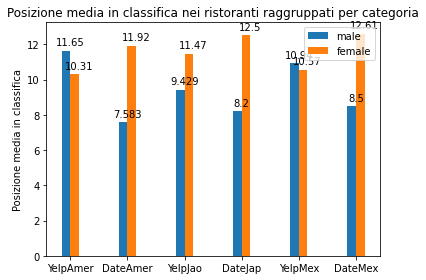

In [ ]:
#==============COSTRUISCO IL GRAFICO========================


labels = ['YelpAmer', 'DateAmer', 'YelpJao', 'DateJap','YelpMex','DateMex']


male = [tot_american_male_relevance, tot_american_male_date,tot_asian_male_relevance, tot_asian_male_date,tot_mexican_male_relevance, tot_mexican_male_date]
female = [tot_american_female_relevance, tot_american_female_date,tot_asian_female_relevance, tot_asian_female_date,tot_mexican_female_relevance, tot_mexican_female_date]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='male')
rects2 = ax.bar(x + width/2, female, width,label ='female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posizione media in classifica')
ax.set_title('Posizione media in classifica nei ristoranti raggruppati per categoria')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()


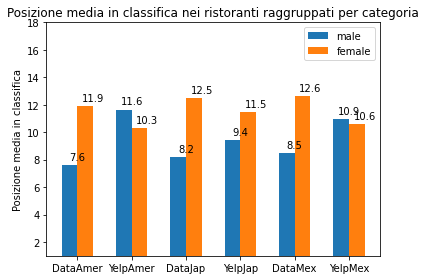

In [14]:
#==============COSTRUISCO IL GRAFICO========================


labels = ['DataAmer', 'YelpAmer', 'DataJap', 'YelpJap','DataMex','YelpMex']


male = [tot_american_male_date, tot_american_male_relevance,tot_asian_male_date, tot_asian_male_relevance,tot_mexican_male_date, tot_mexican_male_relevance]
female = [tot_american_female_date, tot_american_female_relevance,tot_asian_female_date, tot_asian_female_relevance,tot_mexican_female_date, tot_mexican_female_relevance]

x = np.arange(len(labels))  # the label locations
width = 0.29  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='male')
rects2 = ax.bar(x + width/2, female, width,label ='female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posizione media in classifica')
ax.set_title('Posizione media in classifica nei ristoranti raggruppati per categoria')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([1,18])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()